# Table of contents
1. [Logistic Regression/Classification:](#1)
2. [Sensitive to imbalance data](#2)
3. [Logistic Regression -Hypothesis Representation](#3)
4. [Implementation of the sigmoid Function](#4)
5. [Interpretation of the Hypothesis Output:](#5)
6. [Logistic Regression -Decision Boundary](#6)
7. [Non-Linear Decision boundary](#7)
8. [Logistic Regression -Cost Function](#8)
9. [Logistic Regression- New Cost Function](#9)
10. [Gradient descent algorithm for Logistic Regression](#10)
11. [Implementation  Logistic Regression with real time data as a example](#11)
12. [Learning parameters using Optimization (scipy.optimize)](#12)
13. [Evaluating logistic regression](#13)
14. [Regularized logistic regression](#14)
15. [Logistic Regression using scikit-learn](#15)
16. [Logistic Regression from Statistical point of view](#16)

[References](#17)

## Logistic Regression/Classification:<a class="anchor" id="1"></a>

Before going ahead what is logistic regression algorithm I would like to highlight the difference between the regression and the classification.

**Regression:** the output variable takes continuous values.

**Classification:** the output variable takes class labels.

Or in simple English  

Regression involves estimating or predicting a response.

Classification is identifying group membership.

Regression models is use to predict the continuous variable such as rainfall,temperature measurement.They can also predict probabilities, such as the probability that an image contains a cat or dog. A probability-predicting regression model can be used as part of a classifier by imposing a decision rule - for example, if the probability is 50% or more, decide it's a cat else dog.This example will be clear soon as we see next how **Linear Regression** can be use for classification.another example is email Spam or not Spam.

**Logistic regression** predicts probabilities, and is therefore a regression algorithm. However, it is commonly described as a classification method in the machine learning literature, because it can be (and is often) used to make classifiers.

Naturally the questions arises and you think about this:

1. Can we use Linear regression for classification purpose? if so,how?
2. How Linear Regression is bad classifier?  

The answer for the first question is yes we can use Linear regression for classification,the following example shows how Linear regression is use for classification and its limitation on classification problem.

Two reasons why linear regression is not suitable:

* The predicted value is continuous, not probabilistic
* Sensitive to imbalance data when using linear regression for classification


Let's say we create a perfectly balanced dataset (as all things should be), where it contains a list of customers a and a label to determine if the customer had purchased. In the dataset, there are 20 customers. 10 customers age between 10 to 19 who did not purchased, and 10 customers age between 20 to 29 who purchased. **Purchased** is a binary label denote by 0 and 1, where **0** denote **customer did not make a purchase** and **1** denote **customer made a purchase.**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
lin_regression = LinearRegression()

In [2]:
x = np.array([i for i in range(10,30)])
y = np.concatenate([np.zeros(10), np.ones(10)])

In [3]:
#y


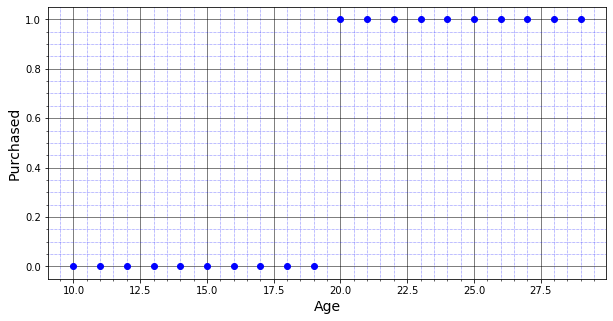

In [4]:
fig = plt.figure(figsize=(10,5))

#plt.grid(color='k', linestyle=':', linewidth=1)
#_ = plt.plot(x, y, 'ob')
plt.plot(x, y, 'ob')

plt.xlabel('Age',fontsize=14)
plt.ylabel('Purchased',fontsize=14)

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
#plt.legend(loc="upper left")
plt.show()

Here we will use **scikit-learn** library for linear regression to fit the line or our hypothesis $h_{\theta}(x)={\theta}_0 +{\theta}_1x $.The objective of a linear regression model is to find a relationship between the input variables and a target variable. Below is our linear regression model that was trained using the above small dataset. The **red line** is the best fit line or best fit of the hypothesis $h_{\theta}(x)$ for the training dataset, which aims to minimize the distance between the predicted value and actual value.  


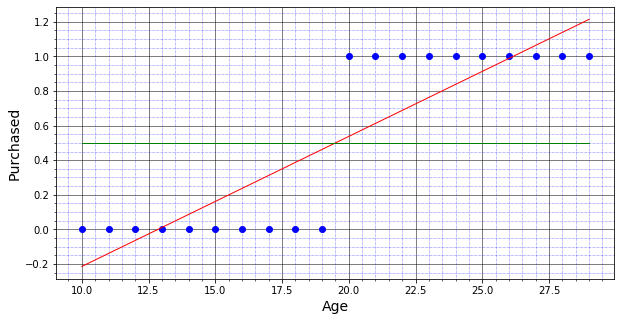

In [5]:
_ = lin_regression.fit(pd.DataFrame(x), y)

#lin_regression.fit(pd.DataFrame(x), y)

lin_y_pred_1 = lin_regression.predict(pd.DataFrame(x))

line_point_5 = x * 0 + .5  # the threshold line 

fig = plt.figure(figsize=(10,5))

plt.plot(x, y, 'ob')
plt.plot(x, lin_y_pred_1, '-r',linewidth=1.0)
plt.plot(x, line_point_5,'-g',linewidth=1.0)

plt.xlabel('Age',fontsize=14)
plt.ylabel('Purchased',fontsize=14)

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
#plt.legend(loc="upper left")
plt.show()

To use this model for prediction is pretty straight forward. Given any age, we are able to predict the value along the Y-axis. If Y is greater than 0.5 (above the green line), predict that this customer will make purchases otherwise will not make purchases.

You can think like this if hypothesis (the predicted value)

$
\begin{aligned}\ h_{\theta}(x^{(i)})={\theta}_0 +{\theta}_1x^{(i)} \end{aligned} \geq 0.5	 
$ 
predict $Y=1$

for particular value of the $ x^{(i)}$,Where $ x^{(i)}$ in this example is particular value of Age. 

Similarly,

$
\begin{aligned}\ h_{\theta}(x^{(i)})={\theta}_0 +{\theta}_1x^{(i)} \end{aligned} < 0.5	 
$ 
predict $Y=0$


In [6]:
test_x = np.array([i for i in range(10,35,5)])
test_y_pred = lin_regression.predict(pd.DataFrame(test_x))
#test_y_pred

In [7]:
df = pd.DataFrame({'Age': test_x, 'Predicted Y Value': test_y_pred})


In [8]:
print(df)

   Age  Predicted Y Value
0   10          -0.214286
1   15           0.161654
2   20           0.537594
3   25           0.913534
4   30           1.289474


## Sensitive to imbalance data<a class="anchor" id="2"></a>

As evidence in above the table for the age 20 onwards predicted value is above 0.5,so we can say that the customer will make purchase.**We can conclude that in this particular scenario Linear regression perform nicely for classification**.Now let's see what happen if we add the customer age above 30 in the data set and run the same algorithm or apply linear regression model.

Let's add 10 more customers age between 60 to 70, and train our linear regression model, finding the best fit line.



In [9]:
x = np.append(x, np.array([i for i in range(60,70)]))
y = np.append(y, np.ones(10))

In [10]:
#x

In [11]:
#y

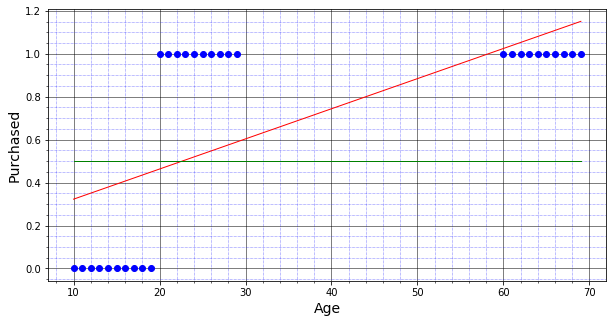

In [12]:
_ = lin_regression.fit(pd.DataFrame(x), y)

lin_y_pred_2 = lin_regression.predict(pd.DataFrame(x))

line_point_5 = x * 0 + .5

fig = plt.figure(figsize=(10,5))

plt.plot(x, y, 'ob')
plt.plot(x, lin_y_pred_2, '-r',linewidth=1.0)
plt.plot(x, line_point_5,'-g',linewidth=1.0)

plt.xlabel('Age',fontsize=14)
plt.ylabel('Purchased',fontsize=14)

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
#plt.legend(loc="upper left")
plt.show()

In [13]:
test_x = np.array([i for i in range(18,26)])
test_y_pred = lin_regression.predict(pd.DataFrame(test_x))
#test_y_pred
df = pd.DataFrame({'Age': test_x, 'Predicted Y Value': test_y_pred})
print(df)

   Age  Predicted Y Value
0   18           0.435047
1   19           0.449085
2   20           0.463122
3   21           0.477160
4   22           0.491197
5   23           0.505235
6   24           0.519272
7   25           0.533310


Our linear regression model manages to fit a new line or hypothesis $h_{\theta}(x)={\theta}_0 +{\theta}_1x $ , but if you look closer, some customers (age 20 to 22) outcome are predicted wrongly.Which supposed to be 0.5 or above 0.5.So the customer age 20 to 22 are actually will make purchases but our model(by considering threshold value below 0.5) put them in to a class of not purchases.

One more interesting fact that in classification problem the predicted value is always between 0 and 1,but our predicted value or the hypothesis $h_{\theta}(x)={\theta}_0 +{\theta}_1x $ is can be greater than one or can go less than zero.So we need a model which can take the hypothesis $h_{\theta}(x)$ in the range as shown

$$
0 \leq h_{\theta}(x) \leq 1
$$

## Logistic Regression -Hypothesis Representation <a class="anchor" id="3"></a>

As discussed above we want our hypothesis $h_{\theta}(x)$in the range as shown

$$
 0\leq h_{\theta}(x) \leq 1
$$
In linear regression we use hypothesis 

$$
h_{\theta}(x)={\theta}^Tx 
$$

So here in logistic Regression we modified the hypothesis little bit as shown.
$$
h_{\theta}(x)=g({\theta}^Tx )
$$

Where, 
$
g(z)=\Large\frac{1}{1+e^{-z}}
$
is **Sigmoid Function** or **Logistic Function**

In our case $z={\theta}^Tx$ so the hypothesis become as shown,

$$
h_{\theta}(x)=g({\theta}^Tx )=\frac{1}{1+e^{-{\theta}^Tx}}
$$



## Implementation of the sigmoid Function <a class="anchor" id="4"></a>
Here first step is to implement sigmoid function in python so it can be called by the rest of your program.

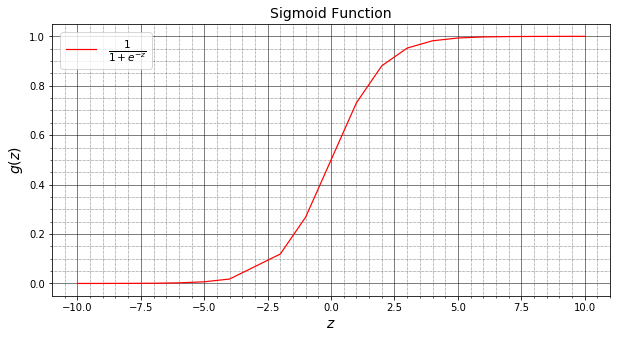

In [14]:
import numpy as np

def sigmoid(z):
    g=(1.0/(1.0+np.exp(-z)))
    return(g)


z=np.array([-10,-9,-8,-7,-6,-5,-4,-2,-1,0,1,2,3,4,5,6,7,8,9,10])
Prob=sigmoid(z)

fig = plt.figure(figsize=(10,5))

plt.plot(z,Prob,'r',linewidth=1.2,label=r'$\frac{1}{1+e^{-z}}$')
plt.title('Sigmoid Function',fontsize=14)

plt.xlabel(r'$z$',fontsize=14)
plt.ylabel(r'$g(z)$',fontsize=14)

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend(loc="upper left",prop={'size': 15})

plt.show()

In [15]:
from ipywidgets import interact

def sigmoid_plot(z):
    g=(1.0/(1.0+np.exp(-z)))
    z1= np.linspace(-10,10,1000)
    g1=(1.0/(1.0+np.exp(-z1)))
    fig = plt.figure(figsize=(10,5))

    plt.plot(z1,g1,'b',z,g,'ro',linewidth=1.2,label=r'$\frac{1}{1+e^{-z}}$')
    plt.title('Sigmoid Function',fontsize=14)

    plt.xlabel(r'$z$',fontsize=14)
    plt.ylabel(r'$g(z)$',fontsize=14)

    # Turn on the minor TICKS, which are required for the minor GRID
    plt.minorticks_on()

    # Customize the major grid
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
    # Customize the minor grid

    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.legend(loc="upper left",prop={'size': 15})

    plt.show()
    
interact(sigmoid_plot,z=(-10,10,2))

interactive(children=(IntSlider(value=0, description='z', max=10, min=-10, step=2), Output()), _dom_classes=('…

<function __main__.sigmoid_plot(z)>

When we are finished with the implementation of the sigmoid function,try testing a few values by calling sigmoid(z)and varying the slider to different values for $z$ For large positive values of $z$, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. **Evaluating sigmoid(0) should give you exactly 0.5.** here code also work with vectors and matrices. For a matrix, here function perform the sigmoid function on every element.

Finally our objective to the fit hypothesis $h_{\theta}(x)$ values in the following range is 
$
 0\leq h_{\theta}(x) \leq 1
$
accomplish as the sigmoid function 
$
g(z)=\Large\frac{1}{1+e^{-z}}
$
lies between $0$ and $1$.

Now by using sigmoid Function we made the hypothesis 
$$
h_{\theta}(x)=g({\theta}^Tx )=\frac{1}{1+e^{-{\theta}^Tx}}
$$

Where again for the data or training data we try to fit the parameter ${\theta}$ and then the hypothesis $h_{\theta}(x)$ will make the prediction for new data.We will talk the learning algorithm later.first we understand what is intuition or interpretation behind the output of the sigmoid Function.  

## Interpretation of the Hypothesis Output: <a class="anchor" id="5"></a>

$
h_{\theta}(x)=g({\theta}^Tx )=\large\frac{1}{1+e^{-\mathbf{\theta}^\intercal {x}}}
$ 
 
**We treat the output of the this hypothesis as estimated probability that $y=1$ on input $x$**

Let's consider above example for different age group customer and their corresponding purchase and not purchase label.

if

$$
x=
\begin{bmatrix}
x_0\\
x_1
\end{bmatrix}
=
\begin{bmatrix}
1\\
Age\hspace{0.1cm}
 Value
\end{bmatrix}
$$

Here say for some values of the ${\theta_0}$ and ${\theta_1}$ and age of the customer we get 

$$
h_{\theta}(x)=0.7
$$

**Then we say that the probability that $y=1$ is $0.7$ or in other words there is $70%$ chance that the customer will make the purchase.**

In mathematically we can represent this as
$
h_{\theta}(x)=P(y=1|x;{\theta})
$
Probability that $y=1$,given $x$  parameterized by ${\theta}$. As we are dealing with classification problem here $y$ will take either `0` or `1` value.So 
$
h_{\theta}(x)=P(y=0|x;{\theta})
$
is also valid and by the law of the probability the 

$$
P(y=1|x;{\theta})+P(y=0|x;{\theta})=1
$$

$$
P(y=1|x;{\theta})=1-P(y=0|x;{\theta})
$$
So we can write

$$
P(y=1|x;{\theta})=h_{\theta}(x)=g({\theta}^Tx )=\frac{1}{1+e^{-{\theta}^Tx}}
$$

$$
P(y=0|x;{\theta})=1-h_{\theta}(x)=1-g({\theta}^Tx )=\frac{1}{1+e^{{\theta}^Tx}}
$$

Which can be written more compactly as 
$$
P(y|x;{\theta})  = g({\theta}^Tx )^y(1-g({\theta}^Tx ))^{1-y} 
$$

So as we consider $y=1$and $y=0$ we will end up with respective probabilities.


## Logistic Regression -Decision Boundary <a class="anchor" id="6"></a>

We talked about the hypothesis function,now we talk about the decision boundary,how decision boundary is related to the hypothesis function?,This will give us a better sense what the logistic regression hypothesis function is computing.

$
h_{\theta}(x)=g({\theta}^Tx )=\large\frac{1}{1+e^{-\mathbf{\theta}^\intercal {x}}}
$ 

$
g(z)=\Large\frac{1}{1+e^{-z}}
$

Supposed we predict $y=1$ if $ h_{\theta}(x) \geq 0.5 $ and $y=0$ if $ h_{\theta}(x) < 0.5$.Which means whenever our hypothesis function is greater than equal to the `0.5` and less than `0.5`,we predict $y=1$ and $y=0$ respectively.Or in other words we favour class 1(1) and class 2(0) respectively. 

Now Think about this:

1. When is our hypothesis exactly greater than equal to 0.5.?
2. When is our hypothesis exactly less than 0.5.?

As we saw above plot,$g(z)\geq 0.5 $ whenever we vary the value of $z$ using the slider to `0` and above `0`.i.e. $z\geq 0$. In contrast with our hypothesis
$
h_{\theta}(x)=g({\theta}^Tx )
$
$
h_{\theta}(x)=g({\theta}^Tx )\geq 0.5
$
only when $\mathbf{\theta}^\intercal {x}\geq 0$

Similarly in above plot,$g(z) < 0.5 $ whenever we vary the value of $z$ using the slider below `0`.i.e. $z < 0$. In contrast with our hypothesis
$
h_{\theta}(x)=g({\theta}^Tx )
$
,
$
h_{\theta}(x)=g({\theta}^Tx ) < 0.5
$
only when $\mathbf{\theta}^\intercal {x} < 0$

In summary we predict $y=1$ if $ h_{\theta}(x) \geq 0.5 $ i.e. whenever our hypothesis function is greater than equal to the `0.5`.In other words
$
h_{\theta}(x)=P(y=1|x;{\theta})\geq 0.5
$
Which is possible only when $\mathbf{\theta}^\intercal {x}\geq 0$
Similarly,we predict $y=0$ if $ h_{\theta}(x) < 0.5 $ i.e. whenever our hypothesis function is less than `0.5`.In other words
$
h_{\theta}(x)=P(y=0|x;{\theta})< 0.5
$
Which is possible only when $\mathbf{\theta}^\intercal {x}< 0$


Let's use this concept to better understand how the hypothesis use to make the prediction.for this [Usefull Link](https://stackoverflow.com/questions/45394981/how-to-generate-list-of-unique-random-floats-in-python?noredirect=1&lq=1) I created the data of the two different classes i.e.`Class 0` and `Class 1` using `random` *module* to generate the random numbers and plotted as shown below.  

In [16]:
import random

def sample_floats(low, high, k=30):
    """ Return a k-length list of unique random floats
        in the range of low <= x <= high
    """
    result = []
    seen = set()
    for i in range(k):
        x = random.uniform(low, high)
        while x in seen:
            x = random.uniform(low, high)
        seen.add(x)
        result.append(x)
    return result

f1=sample_floats(0.1,2)
#f1

In [17]:
f2=sample_floats(0.1,2)
#f2

In [18]:
f3=sample_floats(2.5,4.5)
f4=sample_floats(2.5,4.5)

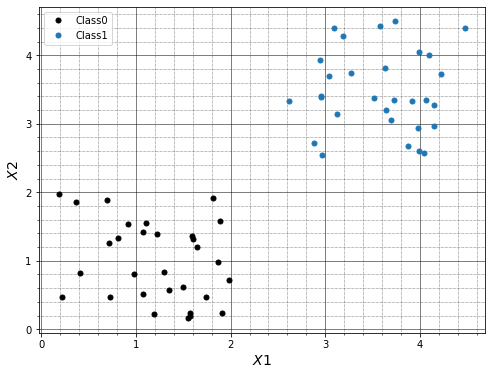

In [19]:
fig = plt.figure(figsize=(8,6))
plt.plot(f1,f2,'ko',f3,f4,'o',markersize=5)

plt.xlabel(r'$X1$',fontsize=14)
plt.ylabel(r'$X2$',fontsize=14)
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend(["Class0", "Class1"], loc="upper left")
plt.show()

The purpose of the creation of the above plotted data is just to understand the concept of the Logistic Regression hypothesis and decision boundary.

Now lets consider the following hypothesis:

$$
h_{\theta}(x)=g({\theta}_0+{\theta}_1x_1+{\theta}_2x_2 )
$$

Till now we haven't talk yet about how to fit the parameters ${\theta}s$.Soon We will talk about it in next session.So now suppose by some procedure(which is to be specified yet) we chose or find out or fit the parameter ${\theta}_0 = -4.5$ , ${\theta}_1 = 1$ and ${\theta}_2 = 1$. The ${\large\theta}$ vector is as shown

$$
{\large\theta}=
\begin{bmatrix}
{\theta}_0\\
{\theta}_1\\
{\theta}_2
\end{bmatrix}
=
\begin{bmatrix}
-4.5\\
1\\
1\\
\end{bmatrix}
$$

As we learn above Predict $y=1$ if $\mathbf{\large\theta}^\intercal {X}\geq 0$ i.e. $ -4.5+x_1+x_2 \geq 0 $ Where 
$$
X=
\begin{bmatrix}
x_0\\
x_1\\
x_2
\end{bmatrix}
$$
**Note:** always $x_0 =1$  

We can say  otherwise Predict $y=1$ if $ x_1+x_2 \geq 4.5$.Any value of example or features $x_1$ and $x_2$ which satisfies this equation will predict $y=1$ or more likely the $y=1$.

Consider $ x_1+x_2 = 4.5$ is the equation of the straight line,let's plot the same line on the above plotted data by choosing the ${\theta}_0=-4.5$, ${\theta}_1=1 $and ${\theta}_2=1$.


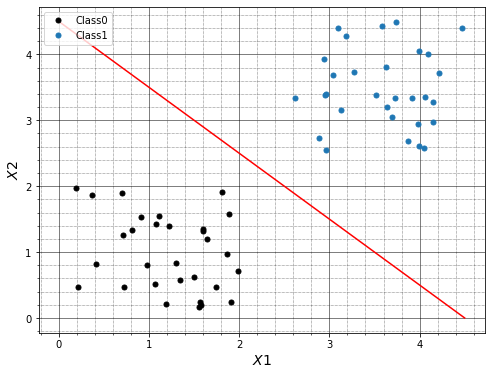

In [20]:
v1=[4.5,0] # x_1= 4.5 and x_2=0
v2=[0,4.5] # x_1= 0.0 and x-

fig = plt.figure(figsize=(8,6))
plt.plot(f1,f2,'ko',f3,f4,'o',markersize=5)
plt.plot(v1,v2,'r')
plt.xlabel(r'$X1$',fontsize=14)
plt.ylabel(r'$X2$',fontsize=14)
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend(["Class0", "Class1"], loc="upper left")
plt.show()

As shown above plot the straight line $ x_1+x_2 = 4.5$ (Red Line) that separate the two classes i.e. `Class 0` and `Class 1`is called the **Decision Boundary**. 

The equation
$ 
x_1+x_2\geq 4.5
$
means that the value above 4.5 belongs to the `Class 1` and the 
$ 
x_1+x_2 < 4.5
$
means that the values below 4.5 belongs to the `Class 0`.

**Note that when**  $ x_1+x_2 = 4.5$ ,$h_{\theta}(x)=0.5$

**Note:** This example is just for the illustration purpose.So the decision boundary is the property of the hypothesis $ h_{\theta}(x)$ and the parameter ${\theta}$. The parameter ${\theta}$ we found out using our data set and using that parameterize hypothesis we draw the decision boundary and separate the two Classes.



## Non-Linear Decision boundary  <a class="anchor" id="7"></a>

Again to better understand how the hypothesis use to make the prediction for more complex example.for this. I created the data of the two different classes i.e.`Class 0` and `Class 1` using `random` *module* to generate the random numbers and plotted as shown below.But here the data is spread Non-linearly.  

In [21]:
import random

def sample_floats(low, high, k=30):
    """ Return a k-length list of unique random floats
        in the range of low <= x <= high
    """
    result = []
    seen = set()
    for i in range(k):
        x = random.uniform(low, high)
        while x in seen:
            x = random.uniform(low, high)
        seen.add(x)
        result.append(x)
    return result

C1=sample_floats(-0.85,0.85)
C2=sample_floats(-0.85,0.85)

In [22]:
c3=[0.5,0.8,1.2,1.4,1.6,1.8]
c4=[2,1.9,1.7,1.5,1.2,0.5]
c5=[-0.5,-0.8,-1.2,-1.4,-1.6,-1.8]
c6=[-2,-1.9,-1.7,-1.5,-1.2,-0.5]


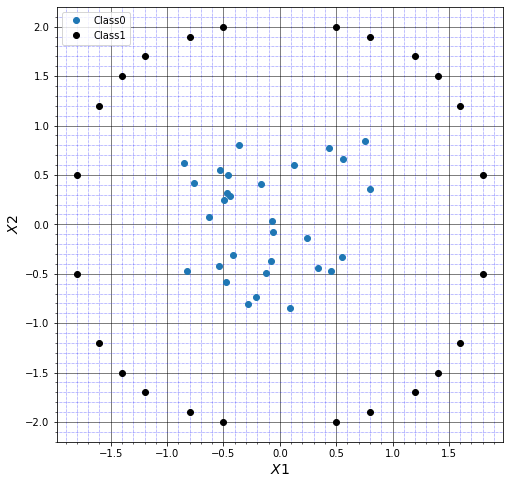

In [23]:
fig = plt.figure(figsize=(8,8))
plt.plot(C1,C2,'o')
plt.plot(c3,c4,'ko',c5,c4,'ko',c5,c6,'ko',c3,c6,'ko')
#t = np.linspace(0,np.pi*2,100)
#plt.plot(np.cos(t), np.sin(t), 'r', linewidth=1)

plt.xlabel(r'$X1$',fontsize=14)
plt.ylabel(r'$X2$',fontsize=14)
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
plt.legend(["Class0", "Class1"], loc="upper left")
plt.show()

The purpose of the creation of the above plotted data is just to understand the concept of the Logistic Regression hypothesis and Non-Linear decision boundary.Here we will add extra higher order variable term or polynomial term in the hypothesis.

Now lets consider the following hypothesis:

$$
h_{\theta}(x)=g({\theta}_0+{\theta}_1x_1+{\theta}_2x_2 +{\theta}_3{x}^2_1 +{\theta}_4{x}^2_2 )
$$

here we added two extra features as the degree two polynomial with five parameters.The extra parameters are ${\theta}_3 $ ,${\theta}_3 $. 

So now suppose by some procedure(which is to be specified yet) we chose or find out or fit the parameter ${\theta}_0 = -1$ , ${\theta}_1 = 0$ , ${\theta}_2 = 0$ ,${\theta}_3 = 1$ and ${\theta}_4 = 1$. The ${\large\theta}$ vector is as shown

$$
{\large\theta}=
\begin{bmatrix}
{\theta}_0\\
{\theta}_1\\
{\theta}_2\\
{\theta}_3\\
{\theta}_4\\
\end{bmatrix}
=
\begin{bmatrix}
-1\\
0\\
0\\
1\\
1\\
\end{bmatrix}
$$

As we learn above Predict $y=1$ if $\mathbf{\large\theta}^\intercal {X}\geq 0$ i.e. $ -1+{x}^2_1+{x}^2_2 \geq 0 $ Where 
$$
X=
\begin{bmatrix}
x_0\\
x_1\\
x_2\\
{x}^2_1\\
{x}^2_2\\
\end{bmatrix}
$$
**Note:** Always $x_0 =1$  

We can say  otherwise Predict $y=1$ if $ x^2_1+x^2_2 \geq 1$.Any value of example or features $x_1$ and $x_2$ which satisfies this equation will predict $y=1$ or more likely the $y=1$.

Consider $ x^2_1+x^2_2 = 1$ is the equation of the Unit circle,let's plot the same line on the above plotted data by choosing the ${\theta}_0=-1$, ${\theta}_1=0 $ ,${\theta}_2=0$,${\theta}_3=1$ and ${\theta}_4=1$.



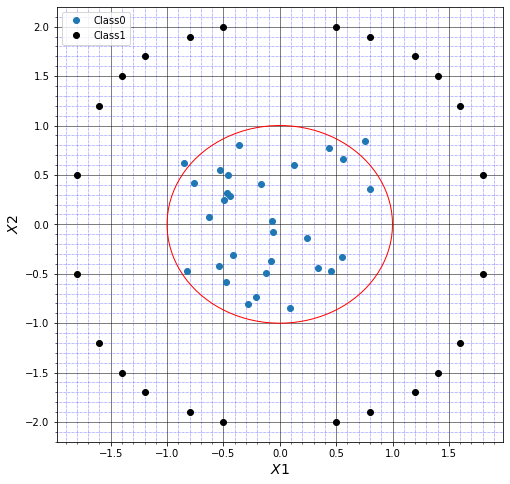

In [24]:
fig = plt.figure(figsize=(8,8))
plt.plot(C1,C2,'o')
plt.plot(c3,c4,'ko',c5,c4,'ko',c5,c6,'ko',c3,c6,'ko')
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), 'r', linewidth=1)

plt.xlabel(r'$X1$',fontsize=14)
plt.ylabel(r'$X2$',fontsize=14)
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
plt.legend(["Class0", "Class1"], loc="upper left")
plt.show()

As shown above plot the Unit circle $ x^2_1+x^2_2 = 1$ (Red circle) that separate the two classes i.e. `Class 0` and `Class 1`is called the **Non-Linear Decision Boundary**. 

The equation
$ 
x^2_1+x^2_2\geq 1
$
means that the value outside 1 belongs to the `Class 1` and the 
$ 
x^2_1+x^2_2 < 1
$
means that the values inside 1 belongs to the `Class 0`.

Finally,you can think about this:

1. Can we come up with more complex shape decision boundary? 

The answer is Yes, for example 

$$
h_{\theta}(x)=g({\theta}_0+{\theta}_1x_1+{\theta}_2x_2 +{\theta}_3{x}^2_1 +{\theta}_4{x}^2_1x_2 +{\theta}_5{x}^2_1{x}^2_2 +{\theta}_6{x}^3_1x_2)
$$

And according to the selected polynomial features the shape of the decision boundary can vary from circle,ellipse etc. 

## Logistic Regression -Cost Function <a class="anchor" id="8"></a>


Here we will define the Optimization Objective of the Cost Function to fit the parameters ${\large\theta}$.

Again it is Supervised Learning problem to fit the Logistic Regression model.

We have,

**Training set:** 
$
\large\{((x^{(1)},y^{(1)}),(x^{(2)},y^{(2)})....(x^{(m)},y^{(m)}))\}
$
, $m$ training examples.

**Feature Vector:**

$$
x\in
\begin{bmatrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_n\\
\end{bmatrix}
$$

As usual our training example is represented by feature vectors of $R^{n+1}$ dimension as we add extra $x_0$.  
Where $x_0=1$,$y\in \{0,1\}$

**Hypothesis:**

$$
h_{\theta}(x)=g({\theta}^Tx )=\frac{1}{1+e^{-{\theta}^Tx}}
$$

How to chose the parameters ${\large\theta}$ ?. 

Our task now is to choose the best parameters ${\theta}$s in the equation above, given the current training set, in order to minimize errors. Remember that ${\theta}$ is not a single parameter: As explain above it expands to the equation of the decision boundary which can be a line or a more complex formula (with more ${\theta}$to guess).

The procedure is similar to what we did for linear regression: define a cost function and try to find the best possible values of each ${\theta}$ by minimizing the cost function output. The minimization will be performed by a gradient descent algorithm, whose task is to parse the cost function output until it finds the lowest minimum point.


$$  
J({\theta}) = \frac{1}{2m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})^2 
$$ 
You might remember the original cost function $J({\theta})$ used in linear regression. I can tell you right now that it's not going to work here with logistic regression. If you try to use the linear regression's cost function to generate $J({\theta})$ in a logistic regression problem, you would end up with a non-convex function: a wierdly-shaped graph with no easy to find minimum global point using gradient descent, as seen in the picture below.

This strange outcome is due to the fact that in logistic regression we have the sigmoid function around
$
h_{\theta}(x)=g({\theta}^Tx )=\large\frac{1}{1+e^{-\mathbf{\theta}^\intercal {x}}}
$ 
,
which is non-linear (i.e. not a line). With the $J({\theta})$ depicted in above image. the gradient descent algorithm might get stuck in a local minimum point. That's why we still need a neat convex function as we did for linear regression: a bowl-shaped function that eases the gradient descent function's work to converge to the optimal minimum point.


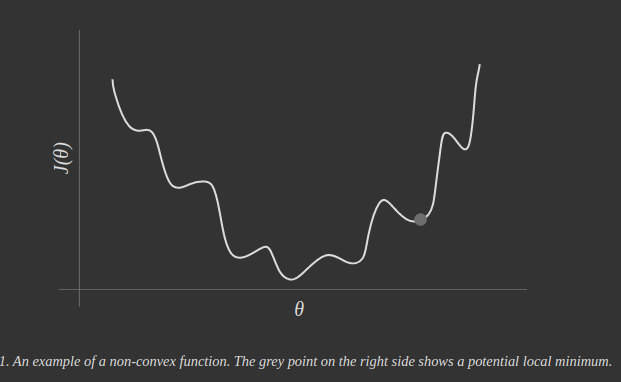

In [25]:
from IPython.display import Image
Image("/home/anil/ML/ML_1/Simple-Linear-Regression-/Logistic_Regression/img_Logistic/non-convex.png",width=500,height=400)


## Logistic Regression- New Cost Function <a class="anchor" id="9"></a>

Let me go back for a minute to the cost function we used in linear regression:


$$  
J({\theta}) =\frac{1}{m}  \sum_{i=1}^m \frac{1}{2} (h_{\theta}(x^{(i)} )-y^{(i)})^2 
$$ 

which can be rewritten in a slightly different way:

Nothing scary happened: I've just moved the $\frac{1}{2}$ next to the summation part. Now let's make it more general by defining a new function

$$
Cost(h_{\theta}(x^{(i)},y^{(i)})=\frac{1}{2} (h_{\theta}(x^{(i)} )-y^{(i)})^2 
$$

In words, a function Cost that takes two parameters in input:$h_{\theta}(x^{(i)})$ as hypothesis function and $y^{(i)}$ as output. You can think of it as the cost the algorithm has to pay if it makes a prediction $h_{\theta}(x^{(i)}$ while the actual label was $y^{(i)}$.

With these idea we can rewrite our cost function for linear regression as:

$$  
J({\theta}) =\frac{1}{m}  \sum_{i=1}^m Cost(h_{\theta}(x^{(i)},y^{(i)})
$$ 

However we know that the linear regression's cost function cannot be used in logistic regression problems as explain last about the issue of the convex optimization. So what is this all about? Well, it turns out that for logistic regression we just have to find a different Cost function, while the summation part stays the same.

For logistic regression, the Cost function is defined as:

$$
\begin{equation}
  Cost(h_{\theta}(x),y)=\begin{cases}
    -\log(h_{\theta}(x)), & \text{if $y=1$}.\\
    -\log(1-h_{\theta}(x)), & \text{if $y=0$}.
  \end{cases}
\end{equation} 
$$

The $i$ indexes have been removed for clarity. In words this is the cost the algorithm pays if it predicts a value $h_{\theta}(x)$ while the actual cost label turns out to be $y$. By using this function we will grant the convexity to the function the gradient descent algorithm has to process, as discussed above.

Let's plot this cost function and gain some intuition 


/home/anil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/anil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


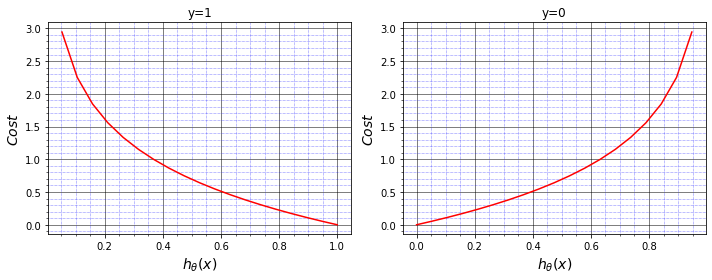

In [26]:
import matplotlib.pyplot as plt
import numpy as np

h_theta_x=np.linspace(0,1,20)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
ax1.plot(h_theta_x,-np.log(h_theta_x),'r')
ax1.set_title('y=1')
ax1.set_xlabel(r'$h_{\theta}(x)$',fontsize=14)
ax1.set_ylabel(r'$Cost$',fontsize=14)
# Turn on the minor TICKS, which are required for the minor GRID
ax1.minorticks_on()

# Customize the major grid
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid

ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')

ax2.plot(h_theta_x,-np.log((1-h_theta_x)),'r')
ax2.set_title('y=0')
ax2.set_xlabel(r'$h_{\theta}(x)$',fontsize=14)
ax2.set_ylabel(r'$Cost$',fontsize=14)
# Turn on the minor TICKS, which are required for the minor GRID
ax2.minorticks_on()

# Customize the major grid
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid

ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
fig.tight_layout() 

In case $y=1$, the output (i.e. the cost to pay) approaches to `0` as ${h_{\theta}(x)}$ approaches to 1.i.e. The predicted value is exactly equal to `1`.Conversely, the cost to pay grows to infinity as ${h_{\theta}(x)}$ approaches to `0`. You can clearly see it in the plot 2. above, left side. This is a desirable property: we want a bigger penalty as the algorithm predicts something far away from the actual value. If the label is y=1 but the algorithm predicts ${h_{\theta}(x)}=0$, the outcome is completely wrong.**Capture the intuition that id ${h_{\theta}(x)}=0$,which means the chance of $y=1$ is nil or less or in other words $ P(y=1|x;{\theta})=0$,but actually $y=1$ so we penalize the learning algorithm by very large cost.**

Conversely, the same intuition applies when y=0, depicted in the plot 2. above, right side. Bigger penalties when the label is y=0 but the algorithm predicts ${h_{\theta}(x)}=1$.


You might thinking now 

$$
\begin{equation}
  Cost(h_{\theta}(x),y)=\begin{cases}
    -\log(h_{\theta}(x)), & \text{if $y=1$}.\\
    -\log(1-h_{\theta}(x)), & \text{if $y=0$}.
  \end{cases}
\end{equation} 
$$

1. Why this cost function ? 
2. How this cost function ?

Recall this compact expression:
$$
P(y|x;{\theta})  = g({\theta}^Tx )^y(1-g({\theta}^Tx ))^{1-y} 
$$

Take the log on the both the side

$$
\log(P(y|x;{\theta}))  =\log(g({\theta}^Tx )^y(1-g({\theta}^Tx ))^{1-y}) 
$$

$$
\log(P(y|x;{\theta}))  =\log(h_{\theta}(x))^y(1-h_{\theta}(x))^{1-y}) 
$$

$$
\log(P(y|x;{\theta}))  =y\log(h_{\theta}(x))+(1-y)\log(1-h_{\theta}(x)) 
$$

it is easier to maximize the log-likelihood as it is a convex. Maximizing the log-likelihood is the same as minimizing the negative log-likelihood ,Instead of squared error, we are using  the negative log-likelihood as the loss function or cost function.**Actual intuition is** [link 1](https://github.com/KnetML/Knet-the-Julia-dope/blob/master/chapter02_supervised-learning/section3-logistic-regression.ipynb) or [link 2](https://stats.stackexchange.com/questions/250937/which-loss-function-is-correct-for-logistic-regression/279698#279698).**Note:** Don't worry if you do not understand this principal of maximum-likelihood ,Just follow the one line cost function as explain below.

$$
-\log(P(y|x;{\theta}))  =-y\log(h_{\theta}(x))-(1-y)\log(1-h_{\theta}(x)) 
$$


Simplified cost function is 

$$
Cost(h_{\theta}(x),y)=-y\log(h_{\theta}(x))-(1-y)\log(1-h_{\theta}(x)) 
$$

try to replace $y$ with `0` and `1` and you will end up with the two pieces of the original function. With the optimization in place, the logistic regression cost function can be rewritten as


$$  
J({\theta}) =\frac{1}{m}  \sum_{i=1}^m Cost(h_{\theta}(x^{(i)},y^{(i)})=-\frac{1}{m} [\sum_{i=1}^m y^{(i)}\log(h_{\theta}(x^{(i)}))+(1-y^{(i)})\log(1-h_{\theta}(x^{(i)})) ]
$$ 

here the minus sign outside to avoid additional parentheses.



## Gradient descent algorithm for Logistic Regression<a class="anchor" id="10"></a>

What's left? We have the hypothesis function and the cost function: we are almost done. It's now time to find the best values for θs parameters in the cost function, or in other words to minimize the cost function by running the gradient descent algorithm. The procedure is identical to what we did for linear regression.

More formally, we want to minimize the cost function:

$$ 
\large\min_{{\theta}} J({\theta})
$$

Which will output a set of parameters ${\theta}$, the best ones (i.e. with less error). Once done, we will be ready to make predictions on new input examples with their features $x$, by using the new ${\theta}$s in the hypothesis function:
$$
h_{\theta}(x)=g({\theta}^Tx )=\frac{1}{1+e^{-{\theta}^Tx}}
$$

Where $h_{\theta}(x)$ is the output, the prediction, or yet the probability that $y=1$.i.e.
$P(y=1|x;{\theta})$

The way we are going to minimize the cost function is by using the gradient descent.The procedure is identical to what we did for [Simple linear regression](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/Simple%20Linear%20Regression/Simple%20Linear%20Regression%20.ipynb).

To minimize the cost function we have to run the gradient descent function on each parameter:

repeat until  converges 
{
 
$
\large {\theta}_j:={\theta}_j- \large\alpha\frac{\large\partial J({\large\theta})}{\large\partial {\theta}_j} 
$


}

Remember to simultaneously update all ${\theta}_i$ as we did in the linear regression counterpart: if you have n features, that is a feature vector ${\large\theta}=[{\theta}_1,{\theta}_2,{\theta}_3 .....{\theta}_n]$, all those parameters have to be updated simultaneously on each iteration:

repeat until  converges 
{
 
$
{\theta}_0:={\theta}_0- \alpha\frac{\partial J({\theta}_0)}{\partial {\theta}_0}
$

$
{\theta}_1:= .....
$

$.
 .
 .
$ 

$
{\theta}_n:= .....
$


}

Now by using following mathematical simplification we can get the $\large\frac{\large\partial J({\large\theta})}{\large\partial {\theta}_j}$.Thanks to this [link](https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression)

$
\theta x^{(i)}:=\theta_0+\theta_1 x^{(i)}_1+\dots+\theta_p x^{(i)}_p.
$

$
\log h_\theta(x^{(i)})=\log\frac{1}{1+e^{-\theta x^{(i)}} }=-\log ( 1+e^{-\theta x^{(i)}} ),
$

$
\log(1- h_\theta(x^{(i)}))=\log(1-\frac{1}{1+e^{-\theta x^{(i)}} })=\log (e^{-\theta x^{(i)}} )-\log ( 1+e^{-\theta x^{(i)}} )=-\theta x^{(i)}-\log ( 1+e^{-\theta x^{(i)}} ),
$

$
J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(h_\theta(x^{(i)}))+(1-y^{(i)})\log(1-h_\theta(x^{(i)}))
$

Plugging in the two simplified expressions above, we obtain

$
J(\theta)=-\frac{1}{m}\sum_{i=1}^m \left[-y^{(i)}(\log ( 1+e^{-\theta x^{(i)}})) + (1-y^{(i)})(-\theta x^i-\log ( 1+e^{-\theta x^{(i)}} ))\right]
$

which can be simplified to:

$
J(\theta)=-\frac{1}{m}\sum_{i=1}^m \left[y_i\theta x^{(i)}-\theta x^{(i)}-\log(1+e^{-\theta x^{(i)}})\right]=-\frac{1}{m}\sum_{i=1}^m \left[y_i\theta x^{(i)}-\log(1+e^{\theta x^{(i)}})\right]
$

where the second equality follows from

$
-\theta x^{(i)}-\log(1+e^{-\theta x^{(i)}})=
-\left[ \log e^{\theta x^{(i)}}+
\log(1+e^{-\theta x^{(i)}} )
\right]=-\log(1+e^{\theta x^{(i)}}).
$


All you need now is to compute the partial derivatives of $J(\theta)$ w.r.t. ${\theta}_j$. 

As

$
\large\frac{\partial}{\partial \theta_j}y_i\theta x^{(i)}=y_ix^{(i)}_j
$

$
\large\frac{\partial}{\partial \theta_j}\log(1+e^{\theta x^{(i)}})=\frac{x^{(i)}_je^{\theta x^{(i)}}}{1+e^{\theta x^{(i)}}}=x^{(i)}_jh_\theta(x^{(i)})
$

So,

$
\large\frac{\large\partial J({\large\theta})}{\large\partial {\theta}_j} =-\frac{1}{m}\sum_{i=1}^{m}(y_ix^{(i)}_j-x^{(i)}_jh_\theta(x^{(i)}))
$

$
\large\frac{\large\partial J({\large\theta})}{\large\partial {\theta}_j} =\large\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y_i)x^{(i)}_j
$

Now we plug this partial differentiation to above loop so now we have algorithm which run as: 

repeat until  converges 
{
 
$
\large {\theta}_j:={\theta}_j- \large\alpha\large\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y_i)x^{(i)}_j
$


}
simultaneously update the all the ${\theta}_j s$.

Surprisingly, it looks identical to what we were doing for the multivariate linear regression. What's changed however is the definition of the hypothesis $h_{\theta}(x):$ for linear Regression we had $h_{\theta}(x)= {\theta}^Tx$,whereas for logistic regression we $h_{\theta}(x)=g({\theta}^Tx )=\frac{1}{1+e^{-{\theta}^Tx}}
$

## Implementation  Logistic Regression with real time data as a example <a class="anchor" id="11"></a>

Now it is time to work on the we would work on some data set and apply all that we learn in logistic regression.
here  we will build a logistic regression model to predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams.


Before starting to implement any learning algorithm, it is always good to visualize the data if possible.In the first part of this code will load the data and display it on a 2-dimensional plot by calling the function *plotData*.
we had written code in *plotData* so that it displays a figure like as shown , where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

In [27]:
import pandas as pd
#read comma separated data and give the proper names to the columnes
df = pd.read_csv('/home/anil/ML/ML_1/Simple-Linear-Regression-/Logistic_Regression/ex2data1.txt',header = None,names=["Exam1","Exam2"," Admissions Decsion"])

In [28]:
df.head() # first five rows along with columns

,Exam1,Exam2,Admissions Decsion
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [29]:
df.shape # good to know the dimension  

(100, 3)

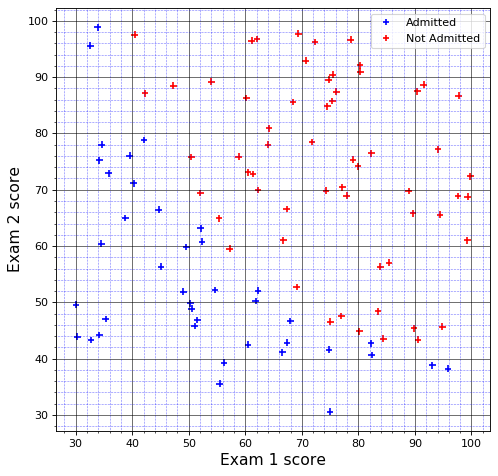

In [30]:
import matplotlib.colors as mcolors
plt.figure(num=0, figsize=(7,7), dpi=80, facecolor='w', edgecolor='k')

A=df.iloc[:,0:1].values
B=df.iloc[:,1:2].values
y=df.iloc[:,2:3].values
s=plt.scatter(A,B, c=y,cmap = mcolors.ListedColormap(["blue", "red"]),marker='+')
plt.xlabel('Exam 1 score',fontsize=14)
plt.ylabel('Exam 2 score',fontsize=14)
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
h,l = s.legend_elements()
#plt.legend((l,l),("Admitted", "Not Admitted"), loc="upper right")
plt.legend(h,("Admitted", "Not Admitted"),loc="upper right")
plt.show()

Now we will implement the cost function and gradient for logistic regression.We write the code in `Cost_Function` to return the cost and gradient.Recall that the cost function in logistic regression is

$$  
J({\theta}) =\frac{1}{m}  \sum_{i=1}^m Cost(h_{\theta}(x^{(i)},y^{(i)})=-\frac{1}{m} [\sum_{i=1}^m y^{(i)}\log(h_{\theta}(x^{(i)}))+(1-y^{(i)})\log(1-h_{\theta}(x^{(i)})) ]
$$ 

and the gradient of the cost is a vector of the same length as ${\theta}$ where the $j$ th element $(for j = 0, 1, . . . , n)$ is defined as follows:

$$
\frac{\partial J({\theta})}{\partial {\theta}_j} =\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y_i)x^{(i)}_j
$$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_{\theta}(x)$.


In [31]:
X=df.iloc[:,0:2].values    # Consider first two column of the data set. 
X=np.insert(X,0,1,axis=1) # Add a column of ones to X.
np.shape(X)
 
    

(100, 3)

In [32]:
initial_theta=np.zeros([3,1])  # initialize fitting parameters
initial_theta
#np.shape(initial_theta)


array([[0.],
       [0.],
       [0.]])

In [33]:
# compute and display initial cost for thetas zero
def Cost_Function(initial_theta,X,y):
    m=len(y)
    J=0
    g=np.zeros([m,1])
    grad=np.zeros([np.size(initial_theta),])
    for i in range(m):
        z=np.dot(X[i,:],(initial_theta))
        g[i]=sigmoid(z)
        J=J+(-y[i]*np.log(g[i])-((1-y[i])*np.log(1-g[i])))
        grad=grad+(g[i]-y[i])*(X[i,:])
    return((J/m),(grad/m))

cost,grad=Cost_Function(initial_theta,X,y)

print('Cost at initial theta (zeros): %.4f\n' %cost)
print('Expected cost (approx):%.4f\n' %0.693)
print('Gradient at initial theta (zeros): \n')
print('{}\n{}\n{}\n'.format(*grad))
#print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')
print('Expected gradients (approx):\n{}\n{}\n{}\n\n'.format(-0.1000,-12.0092,-11.2628))


Cost at initial theta (zeros): 0.6931

Expected cost (approx):0.6930

Gradient at initial theta (zeros): 

-0.1
-12.009216589291148
-11.262842205513591

Expected gradients (approx):
-0.1
-12.0092
-11.2628




In [34]:
# Compute and display cost and gradient with non-zero theta
test_theta = [-24, 0.2, 0.2]
cost,grad=Cost_Function(test_theta,X,y)

print('Cost at initial theta (zeros): %.4f\n' %cost)
print('Expected cost (approx):%.4f\n' %0.218)
print('Gradient at initial theta (zeros): \n')
print('{}\n{}\n{}\n'.format(*grad))
#print('Expected gradients (approx):\n 0.043\n 2.566\n 2.467\n')
print('Expected gradients (approx):\n{}\n{}\n{}\n\n'.format(0.043,2.566,2.467))

Cost at initial theta (zeros): 0.2183

Expected cost (approx):0.2180

Gradient at initial theta (zeros): 

0.04290299489953443
2.566234115510756
2.646797371082432

Expected gradients (approx):
0.043
2.566
2.467




## Learning parameters using Optimization (scipy.optimize)<a class="anchor" id="12"></a>
In the [Simple Linear Regression](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/Simple%20Linear%20Regression/Simple%20Linear%20Regression%20.ipynb) we found the optimal parameters of a linear regression model by implementing gradient descent. we wrote a cost function and calculated its gradient, then took a gradient descent step accordingly.This time, instead of taking gradient descent steps, we will use an built-in function called `(scipy.optimize)` as [link1](https://docs.scipy.org/doc/scipy-0.10.0/reference/tutorial/optimize.html) and [link2](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-tnc.html) or [link3](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize).The following code is obtained [from](https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy).

Python`(scipy.optimize)` is an optimization solver that finds the minimum of an unconstrained function(**Constraints in optimization often refer to constraints on the parameters, for example,
constraints that bound the possible values ${\theta}$ can take (e.g., ${\theta} \leq 1$). Logistic regression
does not have such constraints since θ is allowed to take any real value.**). For logistic regression, you want to optimize the cost function $J({\theta})$ with parameters ${\theta}$.

Concretely, we are going to use `(scipy.optimize)` to find the best parameters ${\theta}$ for the logistic regression cost function, given a fixed dataset (of $X$ and $y$ values). We will pass to `op.minimize` the following inputs:

* The initial values of the parameters `x0 = initial_theta` we are trying to optimize.
* A function `CostFunc`  that, when given the training set and a particular ${\theta}$, computes the logistic regression cost `CostFunc` and gradient `Gradient` with respect to ${\theta}$ for the dataset $(X, y)$.

In [35]:
import numpy as np
import scipy.optimize as op

def Gradient(theta,x,y):
    m , n = x.shape
    theta = theta.reshape((n,1));
    y = y.reshape((m,1))
    sigmoid_x_theta = sigmoid(x.dot(theta));
    grad = ((x.T).dot(sigmoid_x_theta-y))/m;
    return grad.flatten();

def CostFunc(theta,x,y):
    m,n = x.shape; 
    theta = theta.reshape((n,1));
    y = y.reshape((m,1));
    term1 = np.log(sigmoid(x.dot(theta)));
    term2 = np.log(1-sigmoid(x.dot(theta)));
    term1 = term1.reshape((m,1))
    term2 = term2.reshape((m,1))
    term = y * term1 + (1 - y) * term2;
    J = -((np.sum(term))/m);
    return J;


m , n = X.shape;
initial_theta = np.zeros(n);
Result = op.minimize(fun = CostFunc, 
                                 x0 = initial_theta, 
                                 args = (X, y),
                                 method = 'TNC',
                                 jac = Gradient);
optimal_theta = Result.x;
cost=Result.fun


# Print theta to screen
print('Cost at theta found by fminunc: %0.5f\n' %cost)
print('Expected cost (approx): {}\n'.format(0.203));
print('theta\n{}\n{}\n{}\n'.format(*optimal_theta))
#print('Expected theta (approx):\n');
#print(' -25.161\n 0.206\n 0.201\n');
print('Expected theta (approx):\n{}\n{}\n{}\n\n'.format(-25.161,0.206,0.201))

Cost at theta found by fminunc: 0.20350

Expected cost (approx): 0.203

theta
-25.16131854473719
0.20623158824548768
0.20147148524111386

Expected theta (approx):
-25.161
0.206
0.201




The above code is self explanatory and to understand the `op.minimize` again use this [link3](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize).If you have written  the `CostFunc` correctly, `op.minimize` will converge on the right optimization parameters and return the final values of the cost and ${\theta}$. Notice that by using `op.minimize`, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by`op.minimize` : you only needed to provide a function `CostFunc` and function `Gradient`calculating the cost and the gradient respectively.

Once `op.minimize` completes,  It will call your `CostFunc` function using the optimal parameters of ${\theta}$. You should see that the cost is about `0.203`.This final ${\theta}$ value will then be used to plot the decision boundary on the training data, resulting in a figure similar as shown below.

In [36]:
plot_x = [np.min(X[:,1])-2,  np.max(X[:,1])+2];
temp=np.multiply(plot_x,optimal_theta[1])+optimal_theta[0]
plot_y=np.multiply((-1.0/+optimal_theta[2]),temp)


Before you understand above code,we have ${\theta}_0 = -25.161$, ${\theta}_1 = 0.206$, ${\theta}_2=0.201$ estimated above by using `op.minimize`. so we have decision boundary $-25.161 +0.206x_1+0.201x_2 =0$. so in above code `plot_x` we had taken two values for $x_1$,i.e. minimum and maximum from $X$.For those two values of $x_1$ we are estimating the values for $x_2$,By using $x_2=(-25.161+0.206x_1)/-0.201$ in `plot_y`. Then we simply plot the two points i.e four Coordinates below as`plt.plot(plot_x,plot_y,'g',linewidth=0.8)`to plot the decision boundary.
`    


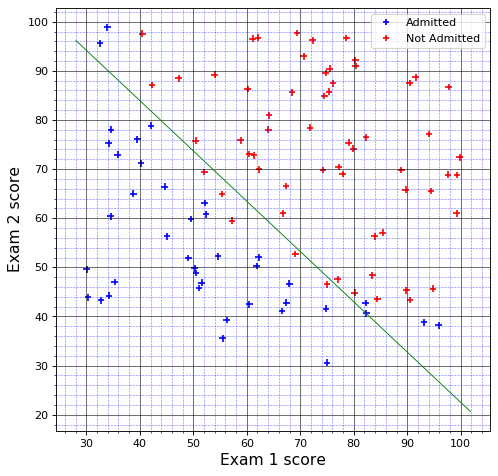

In [37]:

import matplotlib.colors as mcolors
plt.figure(num=0, figsize=(7,7), dpi=80, facecolor='w', edgecolor='k')

A=df.iloc[:,0:1].values
B=df.iloc[:,1:2].values
y=df.iloc[:,2:3].values
s=plt.scatter(A,B, c=y,cmap = mcolors.ListedColormap(["blue", "red"]),marker='+')
plt.xlabel('Exam 1 score',fontsize=14)
plt.ylabel('Exam 2 score',fontsize=14)
plt.plot(plot_x,plot_y,'g',linewidth=0.8)
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
h,l = s.legend_elements()

#plt.legend((l,l),("Admitted", "Not Admitted"), loc="upper right")
plt.legend(h,("Admitted", "Not Admitted"),loc="upper right")
plt.show()

## Evaluating logistic regression<a class="anchor" id="13"></a>
After learning the parameters, we can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.

In [38]:
prob = sigmoid(np.dot([1,45,85],optimal_theta))
print('For a student with scores 45 and 85, we predict an admission probability of %.4f\n' %prob);
print('Expected value: 0.775 +/- 0.002\n\n');

For a student with scores 45 and 85, we predict an admission probability of 0.7763

Expected value: 0.775 +/- 0.002




Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, we will write `Predict` The predict function will produce `1` or `0`predictions given a dataset and a learned parameter vector ${\theta}$. After you have completed the code in `Predict`, then script will proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [39]:
def Predict(theta,X):
    m=len(X)
    P=np.zeros([m,1])
    for i in range(m):
        if (sigmoid(np.dot(X[i,:],theta))>=0.5):
            P[i]=1
        else:
            P[i]=0
    return(P)

P = Predict(optimal_theta, X)
            
print('Train Accuracy: % 0.2f\n' %(np.mean(np.double(P == y)) * 100));
print('Expected accuracy (approx):{}\n'.format(89.0));
print('\n');

Train Accuracy:  89.00

Expected accuracy (approx):89.0





## Regularized logistic regression<a class="anchor" id="14"></a>

Coming soon....

## Logistic Regression using scikit-learn<a class="anchor" id="15"></a>

Coming soon.... 


## Logistic Regression from Statistical point of view <a class="anchor" id="16"></a>

Coming soon....

## References. <a class="anchor" id="17"></a>
 
   * [1] [Coursera ML course by Andrew Ng.](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=33&t=4s)
   * [2] [towardas data science](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)
   * [3] [Why linear Regression is not suitable for classification](https://jinglescode.github.io/datascience/2019/05/07/why-linear-regression-is-not-suitable-for-classification/)
   * [4] [The cost function in logistic regression](https://www.internalpointers.com/post/cost-function-logistic-regression)
   * [5] [Bishop - Pattern Recognition And Machine Learning - Springer 2006](https://www.academia.edu/17851990/Bishop_Pattern_Recognition_and_Machine_Learning)